## PLOTTING
This script plots the output positions from FlexibleSheet.py in 3D for visualisation.

In [88]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib notebook')


In [145]:
DOWNSAMPLE = 20 #plot the position every how many time steps?

#choose the same SAVE_DIR as used in FlexibleSheet.py
SAVE_DIR = '/Users/marleymoore/Desktop/University of Manchester/Year 4/MPhys Project/Semester 2'
 
#loads all the positions as an array from pickle dump 
OUTPUT_PATH = Path(SAVE_DIR) / 'runs' / 'FLEXI_FIBRE_ANGLED.txt' 

In [146]:
with open(OUTPUT_PATH, "rb") as f:
    list_of_positions = pickle.load(f)


In [147]:
print("There are {} beads in this lattice".format(len(list_of_positions[0])))
print("The simulation has performed {} time steps".format(len(list_of_positions)))

There are 144 beads in this lattice
The simulation has performed 100 time steps


In [148]:
# Set to a number < len(list_of_positions) to see only the first that many
CUT_SAMPLE = len(list_of_positions)
#CUT_SAMPLE = 3000
assert(CUT_SAMPLE <= len(list_of_positions))

list_of_positions = list_of_positions[:CUT_SAMPLE]
print(len(list_of_positions))

100


In [149]:
def set_axes_equal(ax):
    # Equal axis for 3D plots
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


In [150]:
def set_axes_equal_xy(ax):
    # Equal axis for 3D plots
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)

    plot_radius = 0.5*max([x_range, y_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])

In [151]:
def plot_3D(positions, every=1, cmap=True):
    """
    Plots the subsequent positions on a 3D plot to visualise the sedimentation
    """
    plt.close('all')
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    #ax.axes.set_xlim3d(left=0, right=1) 
    #ax.axes.set_ylim3d(bottom=-1, top=1) 
    #ax.axes.set_zlim3d(bottom=-1, top=1)
        
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []
    
    number_of_steps = len(positions)
    
    for timestep in range(int(number_of_steps/every)):
        position_t_df = pd.DataFrame(positions[every * timestep],
                                     columns=['x','y','z'])
        
        x_coordinates = position_t_df['x']
        y_coordinates = position_t_df['y']
        z_coordinates = position_t_df['z']
        
        if cmap == True:
            ax.plot_trisurf(x_coordinates, y_coordinates, z_coordinates, color='b',
                             antialiased = True, alpha = 0.5, cmap=plt.cm.Spectral)
        
        else:
            ax.plot_trisurf(x_coordinates, y_coordinates, z_coordinates, color='b',
                             antialiased = True, alpha = 0.5)
    
    # for angle in range(0,360,10): 
    #     ax.view_init(30,angle)
    
    set_axes_equal_xy(ax)
    ax.axis('off')
    plt.show()
    
    return None 


<IPython.core.display.Javascript object>


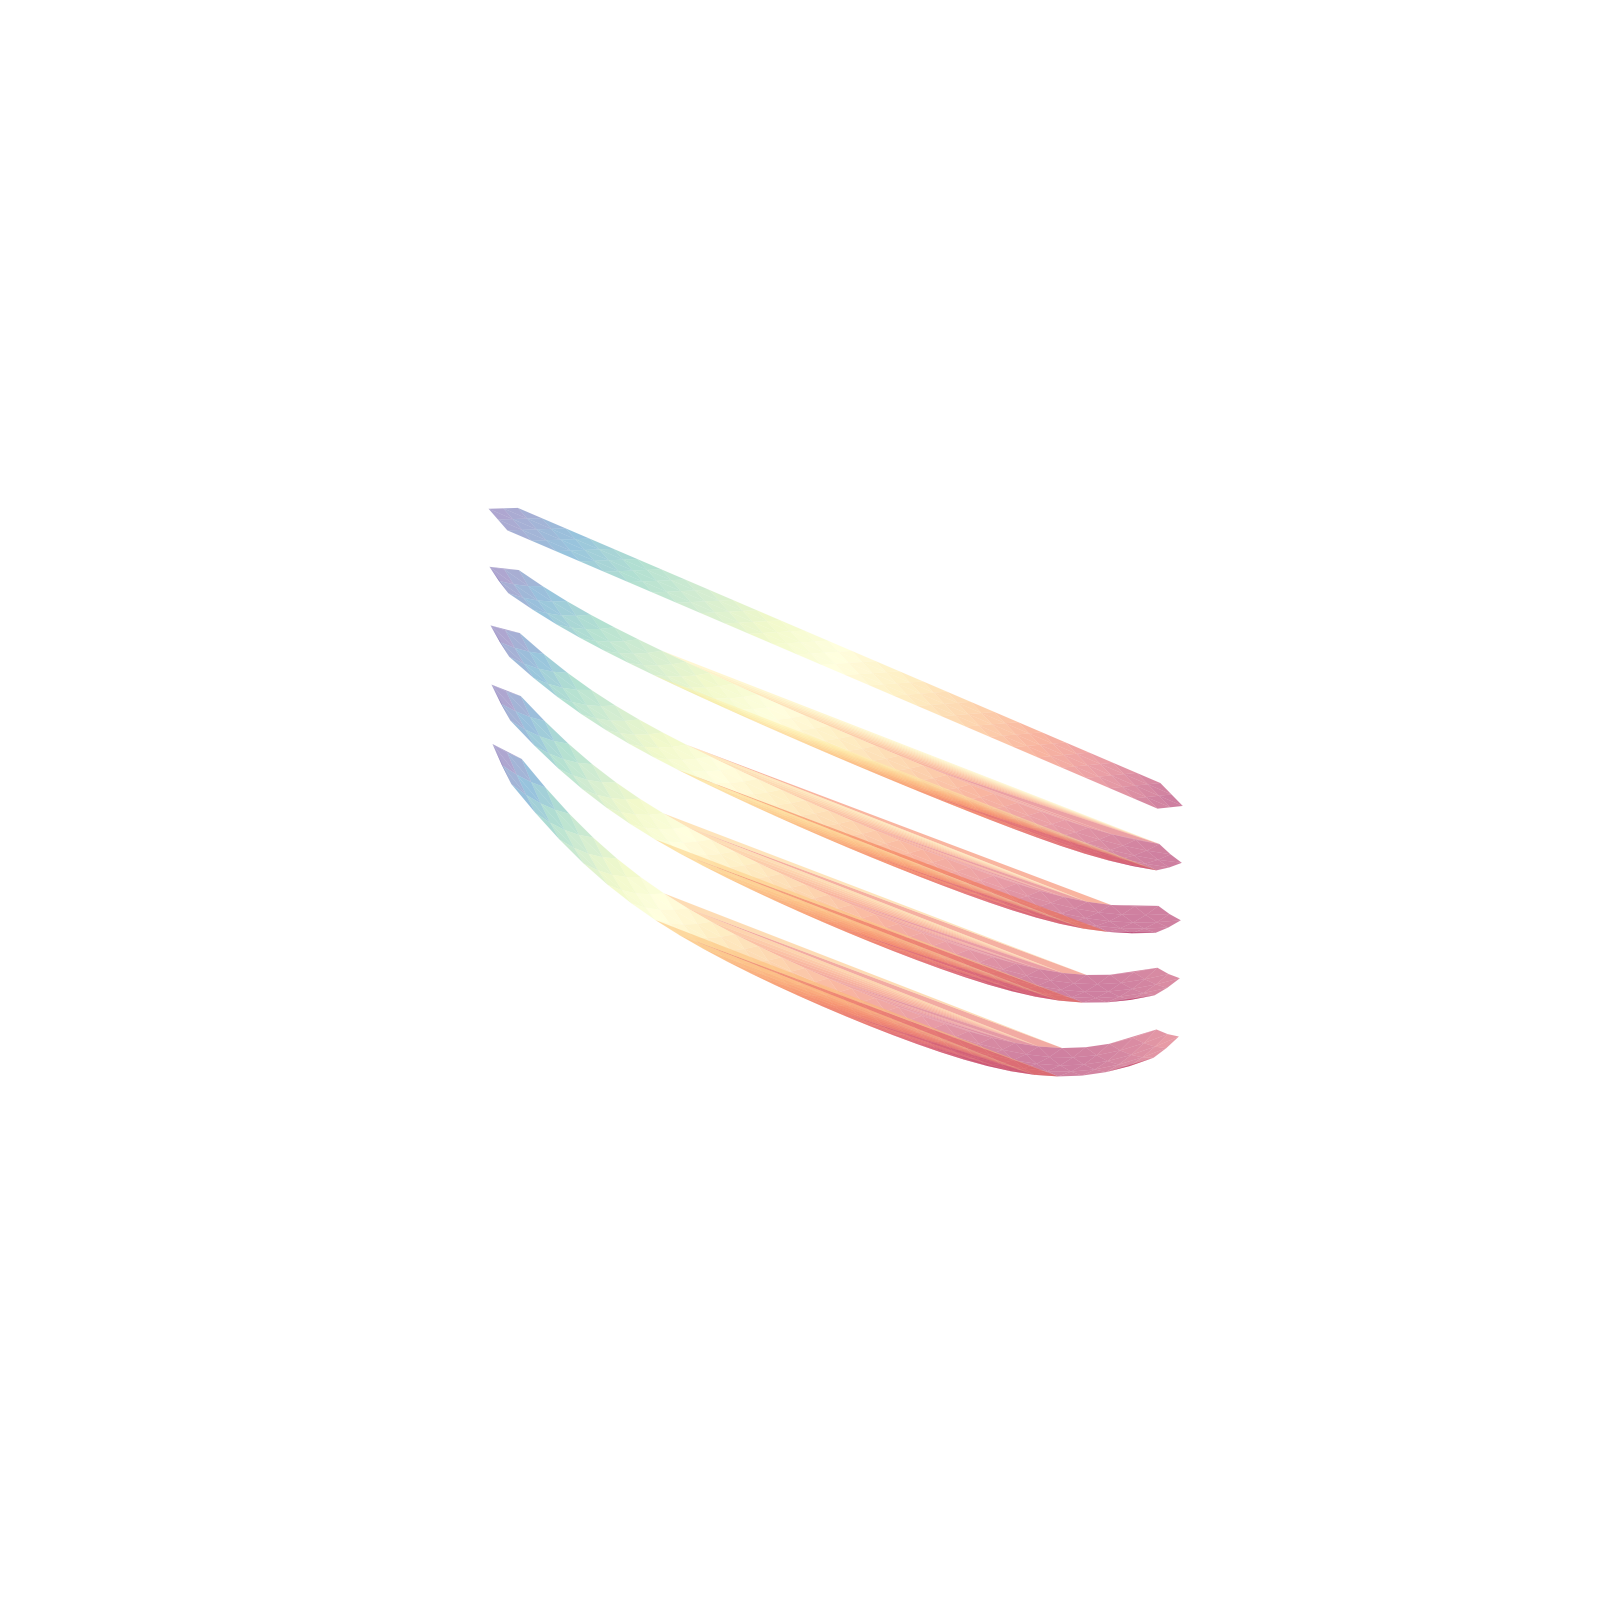

In [152]:
plot_3D(list_of_positions, every=DOWNSAMPLE, cmap=True)

In [1292]:
def plot_time_step(positions, ts):
    plt.close('all')
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []
    
    number_of_steps = len(positions)
    
    position_t_df = pd.DataFrame(positions[ts],
                                 columns=['x','y','z'])
    
    x_coordinates = position_t_df['x']
    y_coordinates = position_t_df['y']
    z_coordinates = position_t_df['z']
    
    ax.plot_trisurf(x_coordinates, y_coordinates, z_coordinates, color='b',
                    antialiased = True, alpha = 0.5)
    
    #set_axes_equal(ax)
    plt.show()
    
    return None

#plot_time_step(list_of_positions, -1)

In [1048]:
# choose the timestep at which you'd like to plot the sheet
PLOT_AT_TIMESTEP = 0

<IPython.core.display.Javascript object>


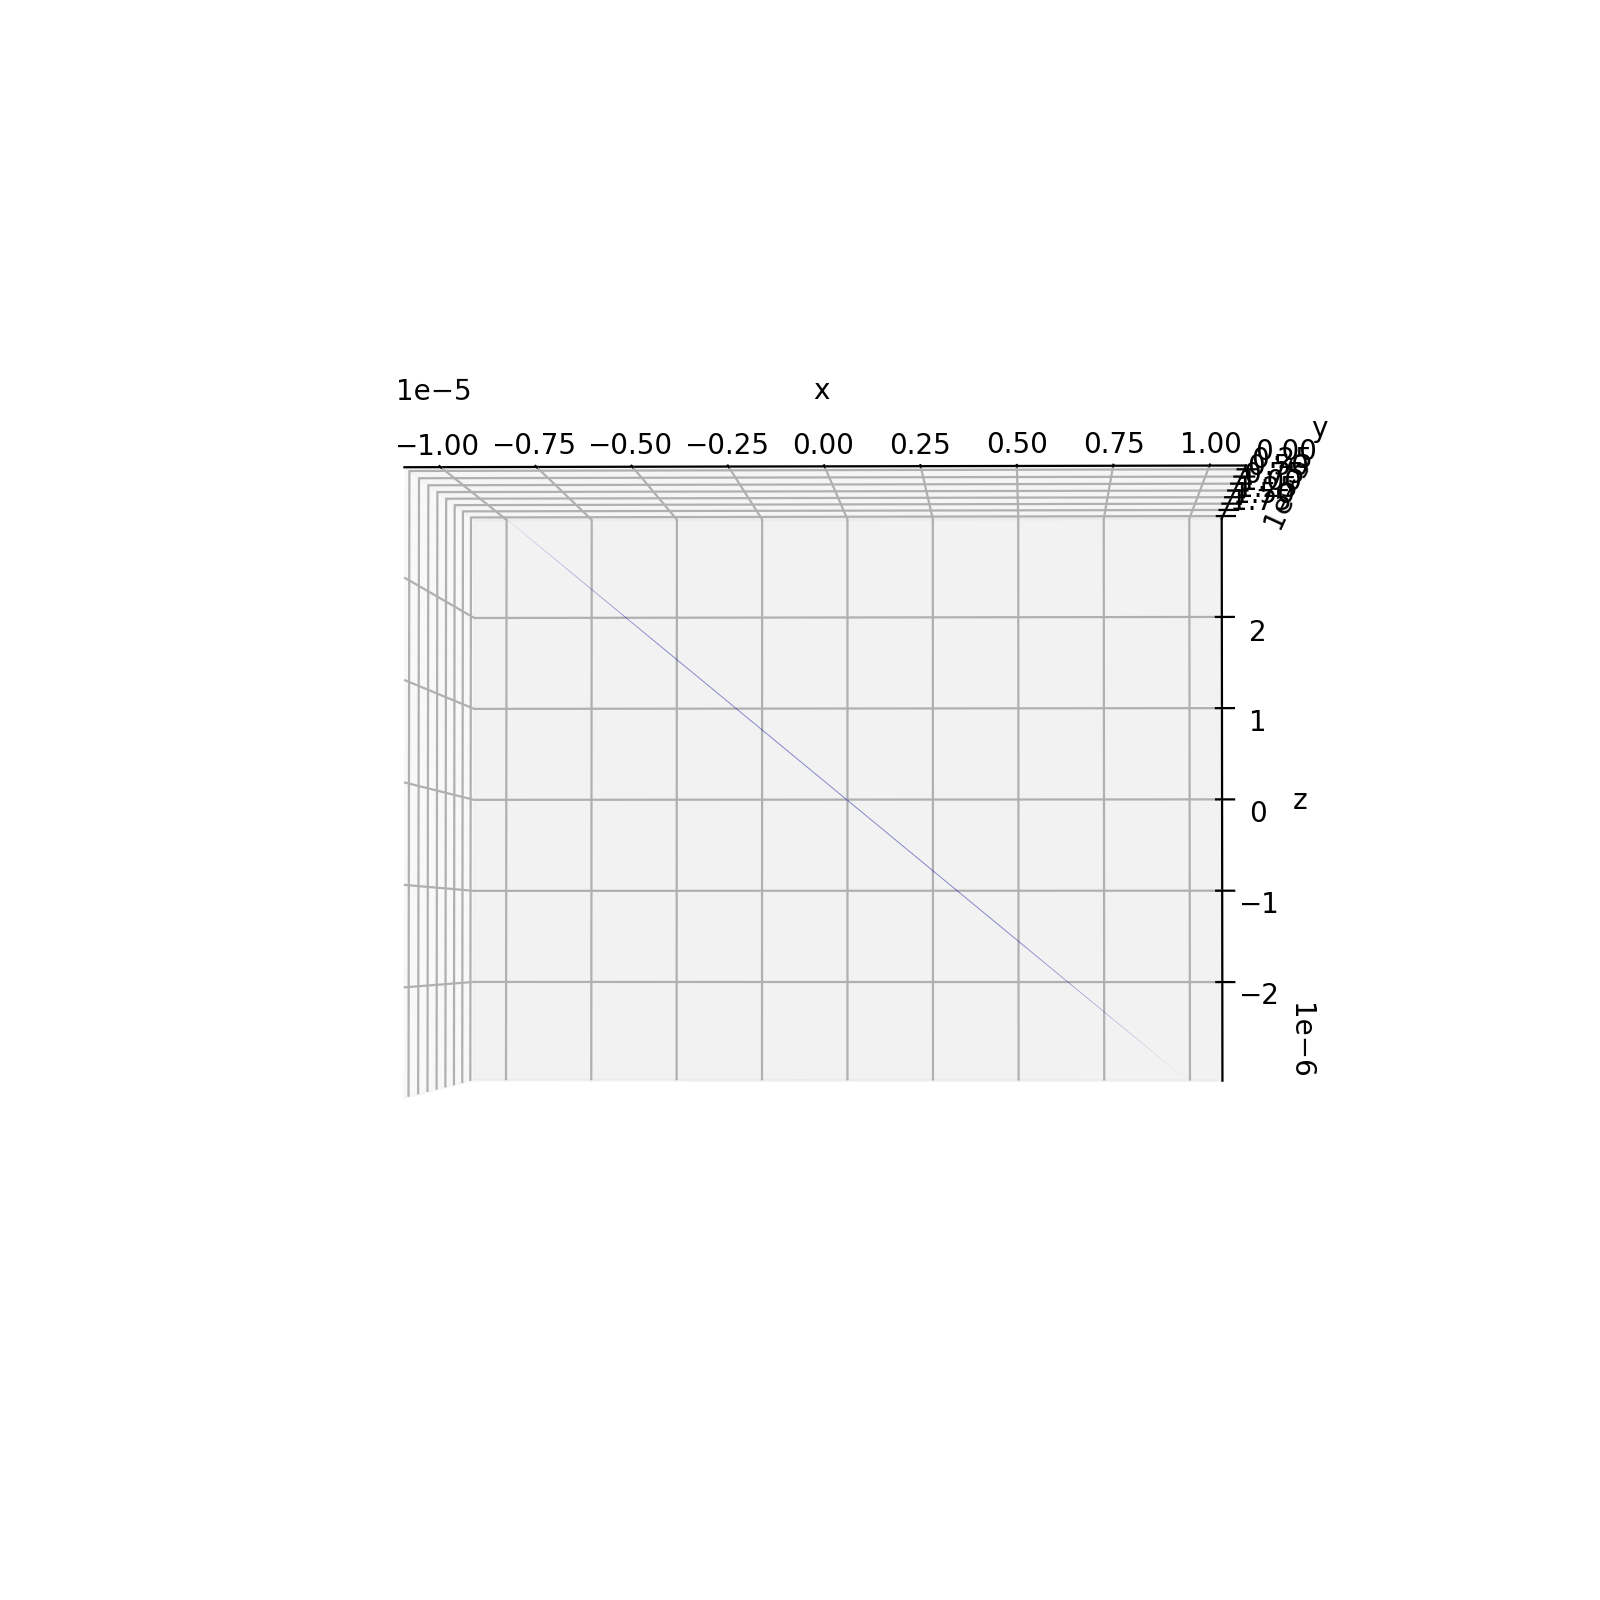

In [1049]:
plot_time_step(list_of_positions,PLOT_AT_TIMESTEP)